  IMPORTING NECESSARY LIBRARIES 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

LOADING : ''MNIST DATASET''
Containig Training samples = 60,000 ; Testing Samples = 10,000
Tesnsorflow already contains MNIST data set which can be loades uding Keras

In [4]:
mnist = tf.keras.datasets.mnist ##this is basically handwritten characters based on 28 x 28 sized images of 0 to 9 .

AFTER LOADING THE MNIST DATA , DIVIDE INTO TRAIN AND TEST DATA SETS

In [5]:
## unpacking the dataset into train and test datasets 
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

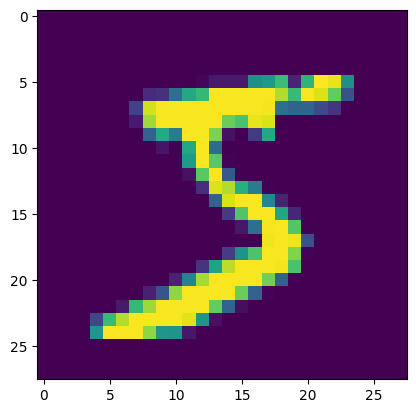

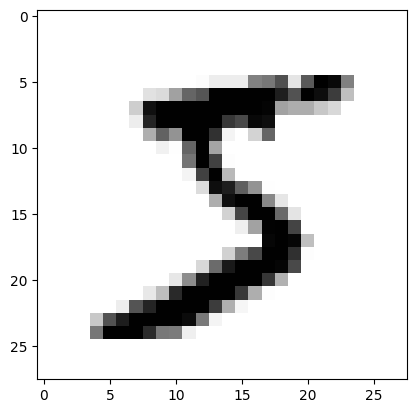

In [8]:
## just check the graph, how data looks like
plt.imshow(x_train[0])
plt.show() ## inorder to execute the graph
## however we dont knoe nthe image is colored or binary 
## so inorder to plot it change the configuration
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [9]:
print(x_train[0]) ## before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

AS IMAGES ARE IN GREY LEVEL ( 1 CHANNEL ==> 0 T0 255 ), NOT COLORED(RGB)
NORMALIZING THE DATA // PREPROCESSINVG STEP

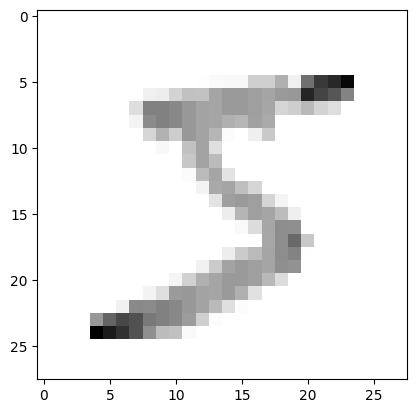

In [10]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
print(y_train[0]) ##just to check the labels inside our network

5


RESIZING IMAGE TO MAKE IT SUITABLE FOE APPLY CONVOLUTION OPERATIONS

In [16]:
IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1 , IMG_SIZE , IMG_SIZE , 1)##increasing one dimension for kernel operation
x_testr=np.array(x_test).reshape(-1 , IMG_SIZE , IMG_SIZE , 1)##increasing one dimension for kernel operation
print("Traing Samples Dimensions", x_trainr.shape)
print("Traing Samples Dimensions", x_testr.shape)

Traing Samples Dimensions (60000, 28, 28, 1)
Traing Samples Dimensions (10000, 28, 28, 1)


CREATING DEEP LEARNING ARCHITECTURE

In [22]:
### creating a neural network 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,Activation , Dropout
model = Sequential()
## first convolution  layer (60000,28,28,1) 28-3+1 = 26 x 26
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))## only for first convolution layer to mention input layer size
model.add(Activation("relu"))## activation function to make it non linear ,<0,remove,>0
model.add(MaxPooling2D(pool_size=(2,2)))## Maxpooling
## second convolution layer
model.add(Conv2D(64,(3,3)))## 2nd convolution layer 26-3+1 = 24 x 24
model.add(Activation("relu"))## activation function 
model.add(MaxPooling2D(pool_size=(2,2)))## Maxpooling
## thhird convolution layer  24 x 24
model.add(Conv2D(64,(3,3)))## 3rd convolution layer
model.add(Activation("relu"))## activation function 
model.add(MaxPooling2D(pool_size=(2,2)))## Maxpooling
## Fully connected layer # 1 20 x 20 = 400
model.add(Flatten()) ## before using fully connected layer need to be flatten so that 20 to 10
model.add(Dense(64))
model.add(Activation("relu"))
## fully connected layer #2
model.add(Dense(32))
model.add(Activation("relu"))
## last fully connected layer , output must be equal to number of classes , 10(0-9)
model.add(Dense(10)) ## this last dense layer must be equal to 10
model.add(Activation('softmax'))


In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_3 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_4 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [24]:
print("Total Traing Samples = " , len(x_trainr))

Total Traing Samples =  60000


In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam" , metrics=['accuracy'])

In [27]:
model.fit(x_trainr,y_train,epochs=5 , validation_split = 0.3)## traing my model

Epoch 1/5
1313/1313 [==============================] - 78s 58ms/step - loss: 0.3223 - accuracy: 0.9003 - val_loss: 0.1328 - val_accuracy: 0.9578
Epoch 2/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.1060 - accuracy: 0.9676 - val_loss: 0.1045 - val_accuracy: 0.9683
Epoch 3/5
1313/1313 [==============================] - 78s 60ms/step - loss: 0.0745 - accuracy: 0.9774 - val_loss: 0.0853 - val_accuracy: 0.9743
Epoch 4/5
1313/1313 [==============================] - 82s 62ms/step - loss: 0.0588 - accuracy: 0.9817 - val_loss: 0.0817 - val_accuracy: 0.9747
Epoch 5/5
1313/1313 [==============================] - 79s 60ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0843 - val_accuracy: 0.9740


In [30]:
## Evaluating  on testing dataset MNIST
test_loss , test_acc = model.evaluate(x_testr , y_test)
print("Test loss on 10,000 test samples ", test_loss)
print("Validation Accuracy on 10,000 test samples ", test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0853 - accuracy: 0.9757
Test loss on 10,000 test samples  0.08533936738967896
Validation Accuracy on 10,000 test samples  0.9757000207901001


In [31]:
## prediction 
predictions = model.predict([x_testr])

313/313 [==============================] - 5s 15ms/step


In [32]:
print(predictions)

[[1.0901000e-11 3.6297827e-06 7.1087761e-08 ... 9.9999607e-01
  4.8223914e-09 8.2609759e-09]
 [3.4035733e-05 1.1331042e-05 9.9986899e-01 ... 6.3559164e-05
  4.7440667e-06 2.2050242e-06]
 [3.6663596e-07 9.9993873e-01 3.2191629e-06 ... 1.5390346e-05
  1.1117064e-05 2.8463398e-07]
 ...
 [5.7647219e-07 3.7366995e-06 1.0260525e-05 ... 2.9938788e-06
  6.6167791e-05 2.6215729e-04]
 [2.5545623e-07 3.7162815e-07 2.3141622e-11 ... 1.7071183e-07
  1.2378219e-04 1.4458826e-08]
 [2.3875858e-05 5.0074472e-05 4.4030163e-05 ... 1.3619099e-05
  3.9471811e-04 1.4944544e-06]]


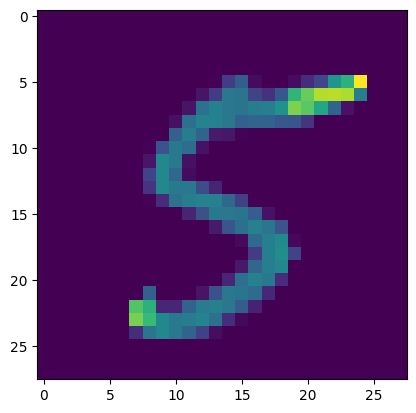

In [34]:
plt.imshow(x_test[129])

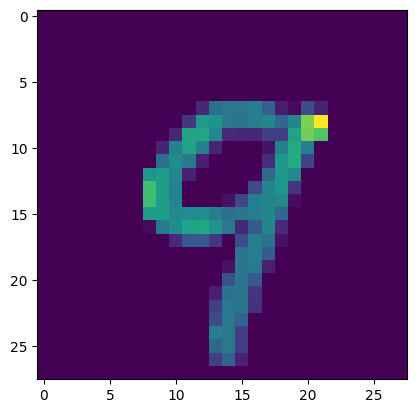

In [35]:
plt.imshow(x_test[12])